# Fraud_Detection_classification

In [87]:
import pandas as pd
import numpy as np 
import seaborn as sb

### Importing dependencies

In [66]:
fraud = pd.read_csv('https://raw.githubusercontent.com/colaberry/data/master/Fraud/fraud_data.csv')


In [67]:
fraud.head(10)

,S,A,F,J,G
0,0,2,1,0,1
1,0,0,1,0,1
2,0,2,1,0,1
3,0,1,1,0,1
4,0,2,0,1,1
5,0,1,1,0,1
6,0,1,0,1,1
7,1,1,1,1,1
8,1,2,1,0,1
9,1,0,1,0,0


# Checking whether the data set is null or not.

In [39]:
fraud.isnull().sum()

S    0
A    0
F    0
J    0
G    0
dtype: int64

# The data set does not have null values at all

In [68]:
from sklearn.model_selection import train_test_split
#Splitting into train and test sets

In [69]:
train,test = train_test_split(fraud,test_size = 0.2) # The data is being divide into train and test in 80,20 ratio

# Knowing the shape of train and test data

In [42]:
train.shape


(8000, 5)

# Rows are 8000 and columns are 5

In [43]:
test.shape  # Rows are 2000 and columns are 5

(2000, 5)

In [44]:
#Therefore the train and test data is divided correctly into 80% and 20%

# Rearranging the columns so that the 'Y' column is placed at the end.

In [70]:
train = train[['S','A','J','G','F']]
test = test[['S','A','J','G','F']]


# Checking for train and test data whether they are arranged or not

In [46]:
train.head(10)

,S,A,J,G,F
662,0,2,0,1,1
7803,1,0,0,1,1
5143,0,1,0,1,1
7952,1,0,0,1,1
1565,1,1,0,1,1
2384,1,2,0,1,1
7772,0,1,0,1,1
7604,1,0,0,1,0
764,1,1,0,1,1
3969,0,0,0,1,1


In [47]:
test.head(10)

,S,A,J,G,F
5010,0,1,0,1,1
9877,1,2,0,1,1
8546,0,0,0,1,1
8851,1,0,0,1,1
2570,1,2,0,0,1
790,0,1,0,1,1
2668,0,1,1,1,0
8994,1,1,0,1,1
1460,1,1,0,1,1
4567,0,2,0,1,1


# Dividing the train,test data into train_X, train_y, test_X, test_y.

In [71]:
train_X = train.iloc[:,0:4]
train_y = train.iloc[:,4]
test_X  = test.iloc[:,0:4]
test_y  = test.iloc[:,4]

# #Naive bayes

In [49]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(train_X,train_y)

GaussianNB(priors=None)

In [50]:
# Predicting the Test set results
y_pred = classifier.predict(test_X)

# Cross Tab

In [51]:
 #Making the Confusion Matrix
pd.crosstab(test_y, y_pred)

col_0,0,1
F,,
0,193,12
1,113,1682


# Accuracy - naive bayes

In [52]:
from sklearn.metrics import accuracy_score


In [53]:
accuracy_score(test_y,y_pred)

0.9375

# #Decision Trees

In [54]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(train_X, train_y)

#Prediction
y_pred = classifier.predict(test_X)

# Cross-Tab

In [55]:
#Making the Confusion Matrix
pd.crosstab(test_y, y_pred)

col_0,0,1
F,,
0,189,16
1,90,1705


In [56]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y,y_pred)

0.94699999999999995

# #Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(train_X,train_y)

# Prediction
y_pred = classifier.predict(test_X)

# Cross-Tab

In [58]:
#Making the Confusion Matrix
pd.crosstab(test_y, y_pred)

col_0,0,1
F,,
0,189,16
1,90,1705


In [59]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y,y_pred)

0.94699999999999995

# #Support Vector Machine (SVM)

In [60]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(train_X,train_y)

#Prediction
y_pred = classifier.predict(test_X)

# Cross-Tab

In [61]:
#Making the Confusion Matrix
pd.crosstab(test_y, y_pred)

col_0,0,1
F,,
0,189,16
1,90,1705


In [62]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y,y_pred)

0.94699999999999995

# #Kernel SVM

In [63]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(train_X,train_y)

# Predicting the Test set results
y_pred = classifier.predict(test_X)

# Cross-Tab

In [64]:
#Making the Confusion Matrix
pd.crosstab(test_y, y_pred)

col_0,0,1
F,,
0,189,16
1,90,1705


In [65]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y,y_pred)

0.94699999999999995

# #Logistic regression

In [72]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(train_X, train_y)

# Predicting the Test set results
y_pred = classifier.predict(test_X)

# Cross_Tab

In [73]:
#Making the Confusion Matrix
pd.crosstab(test_y, y_pred)

col_0,0,1
F,,
0,194,13
1,86,1707


In [74]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y,y_pred)

0.95050000000000001

# #KNN

In [76]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

acc = []

for i in range(3,100,2):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(train.iloc[:,0:4],train.iloc[:,4])
    train_acc = np.mean(neigh.predict(train.iloc[:,0:4])==train.iloc[:,4])
    test_acc = np.mean(neigh.predict(test.iloc[:,0:4])==test.iloc[:,4])
    acc.append([train_acc,test_acc])

# Above we are storing the accuracies for different values of neighbours from 3 to 100 and storing them into 'acc'

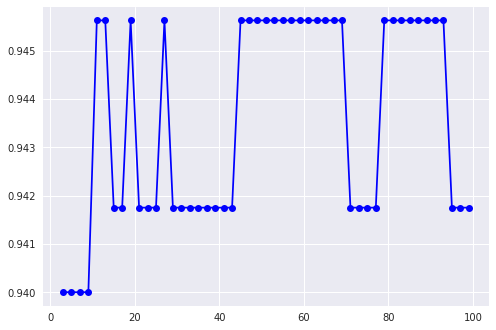

In [77]:
# train accuracy plot 
plt.plot(np.arange(3,100,2),[i[0] for i in acc],"bo-")

In [35]:
# We hence choose the top most point as the number of neighbours and proceed to build our model. Ideally 60.

# train accuracy plot 

In [78]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 60, metric = 'minkowski', p = 2)
classifier.fit(train_X,train_y)

# Predicting the Test set results
y_pred = classifier.predict(test_X)

# Cross-Tab

In [79]:
#Making the Confusion Matrix
pd.crosstab(test_y, y_pred)

col_0,0,1
F,,
0,194,13
1,86,1707
